In [3]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 146s 1us/step


In [5]:
NUM_CLASSES = 10

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [7]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

In [8]:
input_layer = Input(shape=(32, 32, 3))

x = Flatten()(input_layer)

x = Dense(units = 300, activation = 'relu')(x)
x = Dense(units = 100, activation = 'relu')(x)

output_layer = Dense(units=NUM_CLASSES, activation='softmax')(x)

model = Model(input_layer, output_layer)

W0604 22:41:22.909537  5740 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0604 22:41:22.940544  5740 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0604 22:41:22.962536  5740 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               921900    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.optimizers import Adam

opt = Adam(lr = 0.0005)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

W0604 22:41:26.430573  5740 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0604 22:41:26.438569  5740 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

W0604 22:41:29.138020  5740 deprecation.py:323] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0604 22:41:29.184990  5740 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
50000/50000 [==============================] - 16s 324us/step - loss: 1.8649 - acc: 0.3278
Epoch 2/10
50000/50000 [==============================] - 13s 262us/step - loss: 1.6748 - acc: 0.4024
Epoch 3/10
50000/50000 [==============================] - 13s 259us/step - loss: 1.5979 - acc: 0.4309
Epoch 4/10
50000/50000 [==============================] - 13s 254us/step - loss: 1.5373 - acc: 0.4536
Epoch 5/10
50000/50000 [==============================] - 12s 247us/step - loss: 1.5005 - acc: 0.4647
Epoch 6/10
50000/50000 [==============================] - 12s 244us/step - loss: 1.4633 - acc: 0.4795
Epoch 7/10
50000/50000 [==============================] - 12s 244us/step - loss: 1.4366 - acc: 0.4876
Epoch 8/10
50000/50000 [==============================] - 12s 246us/step - loss: 1.4128 - acc: 0.4969
Epoch 9/10
50000/50000 [==============================] - 12s 246us/step - loss: 1.3866 - acc: 0.5081
Epoch 10/10
50000/50000 [==============================] - 12s 250us/step - loss: 

In [12]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 90us/step


[1.4278397064208985, 0.497]

In [13]:
CLASSES = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [14]:
import matplotlib.pyplot as plt

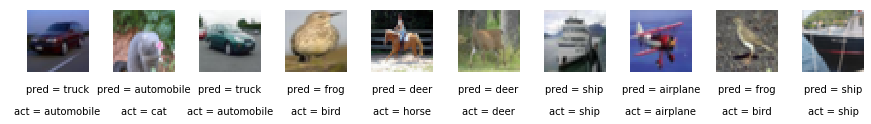

In [15]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = '+str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = '+str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

CNN

In [16]:
from keras.layers import Conv2D

In [17]:
cnn_input_layer = Input(shape = (32, 32, 3))

conv_1 = Conv2D(
    filters = 12,
    kernel_size = (4, 4),
    strides = 2,
    padding = 'same')(cnn_input_layer)

conv_2 = Conv2D(
    filters = 24,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same')(conv_1)

flatten_layer = Flatten()(conv_2)
output_layer = Dense(units = NUM_CLASSES, activation = 'softmax')(flatten_layer)

cnn_model = Model(cnn_input_layer, output_layer)

In [18]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 12)        588       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 24)          2616      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                15370     
Total params: 18,574
Trainable params: 18,574
Non-trainable params: 0
_________________________________________________________________


In [19]:
cnn_model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [20]:
cnn_model.fit(x_train, y_train, epochs=10, shuffle=True, batch_size=32)

Epoch 1/10
50000/50000 [==============================] - 13s 270us/step - loss: 1.7991 - acc: 0.3781
Epoch 2/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.7176 - acc: 0.4116
Epoch 3/10
50000/50000 [==============================] - 12s 242us/step - loss: 1.7051 - acc: 0.4180
Epoch 4/10
50000/50000 [==============================] - 11s 224us/step - loss: 1.6935 - acc: 0.4222
Epoch 5/10
50000/50000 [==============================] - 11s 229us/step - loss: 1.6878 - acc: 0.4258
Epoch 6/10
50000/50000 [==============================] - 12s 236us/step - loss: 1.6809 - acc: 0.4280
Epoch 7/10
50000/50000 [==============================] - 12s 237us/step - loss: 1.6768 - acc: 0.4301
Epoch 8/10
50000/50000 [==============================] - 12s 231us/step - loss: 1.6733 - acc: 0.4305
Epoch 9/10
50000/50000 [==============================] - 12s 242us/step - loss: 1.6688 - acc: 0.4328
Epoch 10/10
50000/50000 [==============================] - 11s 228us/step - loss: 

In [21]:
cnn_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 105us/step


[1.714497669029236, 0.4112]

CNN model 2

In [22]:
from keras.layers import BatchNormalization, LeakyReLU, Dropout

In [23]:
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(cnn_input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(units = 128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

output_layer = Dense(units=NUM_CLASSES, activation='softmax')(x)

cnn_model2 = Model(cnn_input_layer, output_layer,)

W0604 22:46:21.048777  5740 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0604 22:46:21.400470  5740 deprecation.py:506] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
cnn_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

In [29]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=50)

Epoch 1/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.3317 - acc: 0.5256
Epoch 2/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.2368 - acc: 0.5564
Epoch 3/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.2109 - acc: 0.5687
Epoch 4/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.1986 - acc: 0.5724
Epoch 5/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.1889 - acc: 0.5752
Epoch 6/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.1740 - acc: 0.5805
Epoch 7/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.1674 - acc: 0.5827
Epoch 8/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.1572 - acc: 0.5877
Epoch 9/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.1493 - acc: 0.5900
Epoch 10/50
50000/50000 [==============================] - 13s 260us/step - loss: 

In [40]:
model.evaluate(x = x_test, y = y_test)

10000/10000 [==============================] - 1s 84us/step


[1.8539651086807252, 0.4936]

In [41]:
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

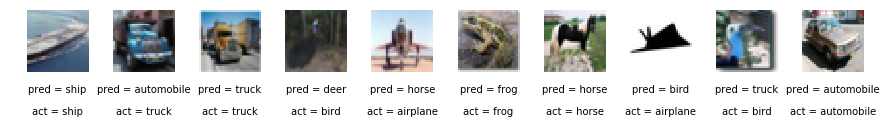

In [42]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = '+str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = '+str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [37]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=50)

Epoch 1/50
50000/50000 [==============================] - 13s 260us/step - loss: 0.9361 - acc: 0.6647
Epoch 2/50
50000/50000 [==============================] - 13s 259us/step - loss: 0.9364 - acc: 0.6659
Epoch 3/50
50000/50000 [==============================] - 13s 261us/step - loss: 0.9275 - acc: 0.6685
Epoch 4/50
50000/50000 [==============================] - 13s 259us/step - loss: 0.9259 - acc: 0.6685
Epoch 5/50
50000/50000 [==============================] - 13s 259us/step - loss: 0.9206 - acc: 0.6709
Epoch 6/50
50000/50000 [==============================] - 13s 264us/step - loss: 0.9163 - acc: 0.6720
Epoch 7/50
50000/50000 [==============================] - 13s 255us/step - loss: 0.9097 - acc: 0.6739
Epoch 8/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.9077 - acc: 0.6736
Epoch 9/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.9060 - acc: 0.6764
Epoch 10/50
50000/50000 [==============================] - 13s 253us/step - loss: 